# HateXplain EDA

## Objective
I want to explore the dataset statistically on linguistic features so that i can
- Decide model will be more suited for this and why
- Find the outlires in the textual data length
- Decide what evaluation metrics will be preferable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer

## Loading the datasets

In [3]:
train_df = pd.read_csv("../data/processed/train.csv")
val_df   = pd.read_csv("../data/processed/val.csv")
test_df  = pd.read_csv("../data/processed/test.csv")

train_df.head()

,post_id,source,text,label,targets,rationale
0,23107796_gab,gab,u really think i would not have been raped by ...,offensive,Hindu|Islam|Other,0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 ...
1,9995600_gab,gab,the uk has threatened to return radioactive wa...,offensive,Indian|Islam|Minority|Refugee,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,1227920812235051008_twitter,twitter,if english is not imposition then hindi is als...,offensive,Hindu|Other,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
3,1204931715778543624_twitter,twitter,no liberal congratulated hindu refugees post c...,offensive,Hindu,0 0 0 0 0 0 0 0 0 1 1
4,1179102559241244672_twitter,twitter,he said bro even your texts sound redneck what...,offensive,Caucasian|Economic,0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0


In [4]:
train_df.shape, val_df.shape, test_df.shape

((15383, 6), (1922, 6), (1924, 6))

In [5]:
train_df.isnull().sum()

post_id         0
source          0
text            0
label           0
targets      3111
rationale       0
dtype: int64

## Class Distribution
To check whether there is any class imbalnce present or not as it makes the accuracy misleading

In [7]:
labels = train_df["label"].value_counts()
labels

label
normal        6251
hatespeech    4748
offensive     4384
Name: count, dtype: int64

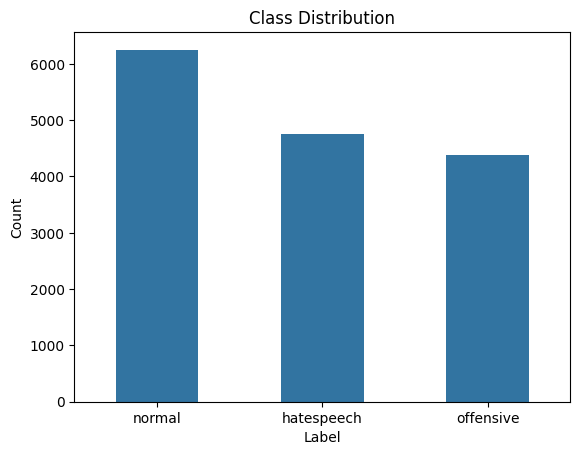

In [8]:
sns.barplot(x=labels.index,y=labels.values,width=0.5)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Label")
plt.show()

In [9]:
train_df[(train_df["targets"].isnull()) & (train_df["label"].values=='hatespeech')]

,post_id,source,text,label,targets,rationale
824,1278613802464931841_twitter,twitter,<user> i hate you,hatespeech,NaN,0 1 1 1
4590,1178324235716087810_twitter,twitter,<user> i hate you,hatespeech,NaN,0 1 1 1
5649,14388377_gab,gab,would you please post something on a public fo...,hatespeech,NaN,0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
8123,1250888651929579520_twitter,twitter,<user> i hate you 😂 💀 💀 💀 💀 😭 😭 😭,hatespeech,NaN,0 1 1 1 0 0 0 0 0 0 0 0
8900,1077844084016828416_twitter,twitter,fuck i hate you,hatespeech,NaN,1 1 1 1
9753,1100222373578432513_twitter,twitter,<user> <user> i hate you 😅,hatespeech,NaN,0 0 1 1 1 0
12218,14518012_gab,gab,he disgusting cuck that deserves to be publicl...,hatespeech,NaN,0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
13640,1210504728913727488_twitter,twitter,i do not need time to forget you but i just ne...,hatespeech,NaN,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
15219,1094503989540843520_twitter,twitter,to the fucking asshole that lit off a firework...,hatespeech,NaN,0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1


## Text Length Analysis


In [10]:
train_df["word_count"] = train_df["text"].apply(lambda x: len(x.split()))
train_df["word_count"].describe()


count    15383.000000
mean        23.465579
std         13.804535
min          2.000000
25%         12.000000
50%         21.000000
75%         34.000000
max        165.000000
Name: word_count, dtype: float64

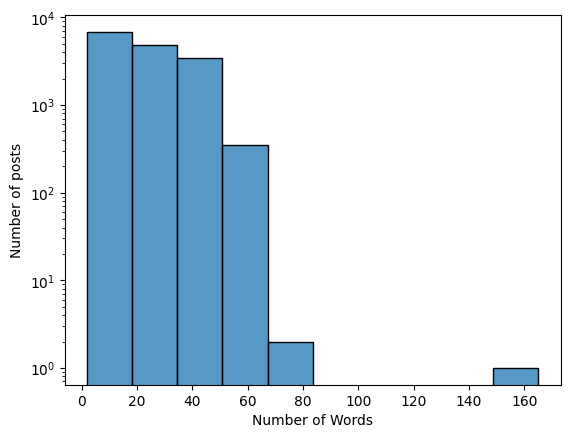

In [11]:
sns.histplot(train_df["word_count"],bins=10)
plt.yscale('log')
plt.xlabel("Number of Words")
plt.ylabel("Number of posts")
plt.show()

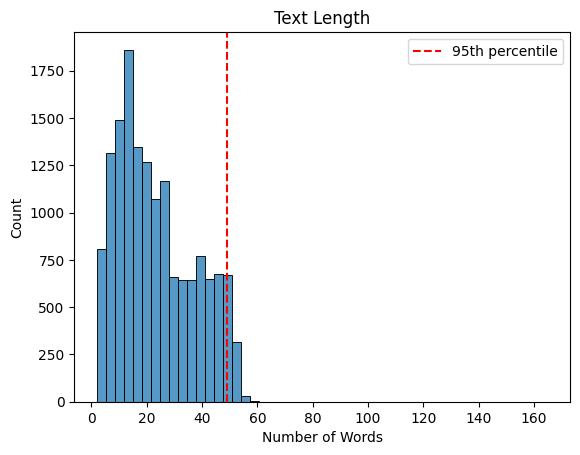

In [12]:
sns.histplot(train_df["word_count"], bins=50)
plt.axvline(
    np.percentile(train_df["word_count"], 95),
    color="red",
    linestyle="--",
    label="95th percentile"
)
plt.legend()
plt.title("Text Length")
plt.xlabel("Number of Words")
plt.show()

In [13]:
np.percentile(train_df["word_count"], 95)

np.float64(49.0)

## Source Analysis

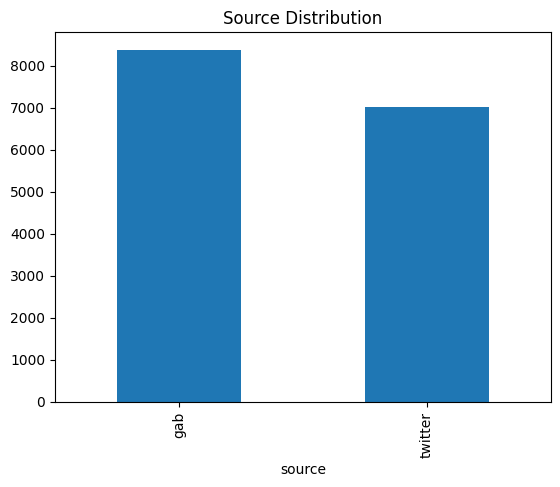

In [ ]:
train_df["source"].value_counts().plot(kind="bar", title="Source Distribution")
plt.show()

In [36]:
pd.crosstab(train_df["label"], train_df["source"], normalize="index")

source,gab,twitter
label,,
hatespeech,0.882477,0.117523
normal,0.262518,0.737482
offensive,0.580748,0.419252


## N-gram Analysis
Analysis of the text to decide wether lexixal features is beneficial for identifying the sentiment to be dependend on baseline representaions like TF-IDF or depend on deep learning contextual representations like embeddings.


In [ ]:
hate_texts = train_df[train_df.label =="hatespeech"]["text"]
off_texts = train_df[train_df.label =="offensive"]["text"]

'fake news has no idea why pussy hat wearing bernie bro boomer anti trump protester with live in indonesian moslem vagina shoots <number> redneck trump voters but fake news is is sure a black saved <number> lives i looked and only saw he told people to run stampeding injuries kill as well'

In [16]:
cv_hate = CountVectorizer(ngram_range=(2,2),stop_words="english",min_df=5)
X = cv_hate.fit_transform(hate_texts)
counts = X.sum(axis=0).A1
vocab = cv_hate.get_feature_names_out()
hate_bigram_freq = list(zip(vocab,counts))
hate_bigram_freq.sort(key=lambda x: x[1], reverse=True)
hate_bigram_freq[:15]

[('sand niggers', np.int64(116)),
 ('user user', np.int64(102)),
 ('sand nigger', np.int64(98)),
 ('white people', np.int64(81)),
 ('nigger nigger', np.int64(69)),
 ('number number', np.int64(69)),
 ('white women', np.int64(37)),
 ('looks like', np.int64(34)),
 ('number years', np.int64(33)),
 ('fuck nigger', np.int64(32)),
 ('anti white', np.int64(30)),
 ('look like', np.int64(30)),
 ('number million', np.int64(29)),
 ('white man', np.int64(29)),
 ('just like', np.int64(28))]

In [17]:
cv_off = CountVectorizer(ngram_range=(2,2),stop_words="english",min_df=5)
X = cv_off.fit_transform(off_texts)
counts = X.sum(axis=0).A1
vocab = cv_off.get_feature_names_out()
off_bigram_freq = list(zip(vocab,counts))
off_bigram_freq.sort(key=lambda x: x[1], reverse=True)
off_bigram_freq[:15]

[('user user', np.int64(252)),
 ('white people', np.int64(60)),
 ('number number', np.int64(50)),
 ('illegal immigrants', np.int64(49)),
 ('white bitch', np.int64(33)),
 ('white women', np.int64(32)),
 ('number years', np.int64(31)),
 ('fucking retarded', np.int64(29)),
 ('illegal aliens', np.int64(29)),
 ('trailer trash', np.int64(28)),
 ('looks like', np.int64(25)),
 ('just like', np.int64(22)),
 ('white men', np.int64(22)),
 ('sand niggers', np.int64(21)),
 ('user retarded', np.int64(21))]

In [18]:
train_df[train_df.targets.str.contains('None', na=False)].head()

,post_id,source,text,label,targets,rationale,word_count
8,24555628_gab,gab,jews defends jews regardless muslims defend mu...,normal,Christian|Islam|Jewish|None,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,41
10,16323644_gab,gab,got a couple more companies you can boycott th...,normal,Caucasian|Men|None|Women,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,54
12,16953323_gab,gab,you are completely correct without it communic...,normal,Caucasian|None,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,29
15,1179015546890784768_twitter,twitter,<user> besudes guilt saviour complex among whi...,normal,Caucasian|None|Women,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,36
20,1178422453749604364_twitter,twitter,blow a stack for yo niggas with yo trapping ass,normal,African|Minority|None|Nonreligious|Other,0 0 0 0 0 0 0 0 0 0,10


### Filling the empty target values with ``` "None" ```

In [19]:
train_df["targets"] = train_df["targets"].fillna("None")
train_df.head()

,post_id,source,text,label,targets,rationale,word_count
0,23107796_gab,gab,u really think i would not have been raped by ...,offensive,Hindu|Islam|Other,0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 ...,33
1,9995600_gab,gab,the uk has threatened to return radioactive wa...,offensive,Indian|Islam|Minority|Refugee,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,32
2,1227920812235051008_twitter,twitter,if english is not imposition then hindi is als...,offensive,Hindu|Other,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0,16
3,1204931715778543624_twitter,twitter,no liberal congratulated hindu refugees post c...,offensive,Hindu,0 0 0 0 0 0 0 0 0 1 1,11
4,1179102559241244672_twitter,twitter,he said bro even your texts sound redneck what...,offensive,Caucasian|Economic,0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0,19


In [20]:
train_df.isnull().sum()

post_id       0
source        0
text          0
label         0
targets       0
rationale     0
word_count    0
dtype: int64

## Target Communities

Analyzed the target communities to see if there is any bias in representation of the dataset.


In [21]:
target_list = targets_series = train_df["targets"].str.split("|")
all_targets = list(chain.from_iterable(target_list))
top_15_targets = Counter(all_targets).most_common(15)
top_15_targets

[('None', 8140),
 ('African', 3400),
 ('Women', 2986),
 ('Other', 2755),
 ('Islam', 2415),
 ('Homosexual', 1972),
 ('Jewish', 1924),
 ('Arab', 1331),
 ('Caucasian', 1280),
 ('Men', 1230),
 ('Refugee', 1229),
 ('Asian', 540),
 ('Hispanic', 529),
 ('Christian', 161),
 ('Minority', 150)]

``` Since "None" is dominating, that's why didn't visuallised on that ```

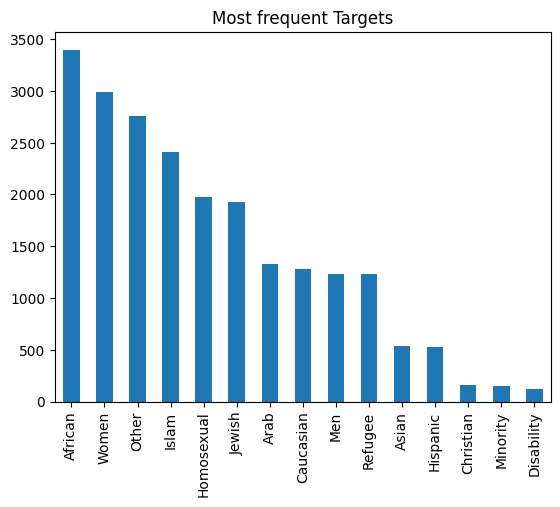

In [22]:
pd.Series(Counter(all_targets)).sort_values(ascending=False).head(16).iloc[1:].plot(kind="bar",title="Most frequent Targets")
plt.show()

## Rationale Analysis

Rationales provide human explanations for classification decisions

In [ ]:
def rationale_density(r):
    vals = list(map(int, r.split()))
    return sum(vals) / len(vals)

train_df["rationale_density"] = train_df["rationale"].apply(rationale_density)
train_df.head()


,post_id,source,text,label,targets,rationale,word_count,rationale_density
0,23107796_gab,gab,u really think i would not have been raped by ...,offensive,Hindu|Islam|Other,0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 ...,33,0.090909
1,9995600_gab,gab,the uk has threatened to return radioactive wa...,offensive,Indian|Islam|Minority|Refugee,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,32,0.062500
2,1227920812235051008_twitter,twitter,if english is not imposition then hindi is als...,offensive,Hindu|Other,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0,16,0.062500
3,1204931715778543624_twitter,twitter,no liberal congratulated hindu refugees post c...,offensive,Hindu,0 0 0 0 0 0 0 0 0 1 1,11,0.181818
4,1179102559241244672_twitter,twitter,he said bro even your texts sound redneck what...,offensive,Caucasian|Economic,0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0,19,0.052632


In [24]:
train_df.groupby("label")["rationale_density"].mean()

label
hatespeech    0.176144
normal        0.000000
offensive     0.168560
Name: rationale_density, dtype: float64

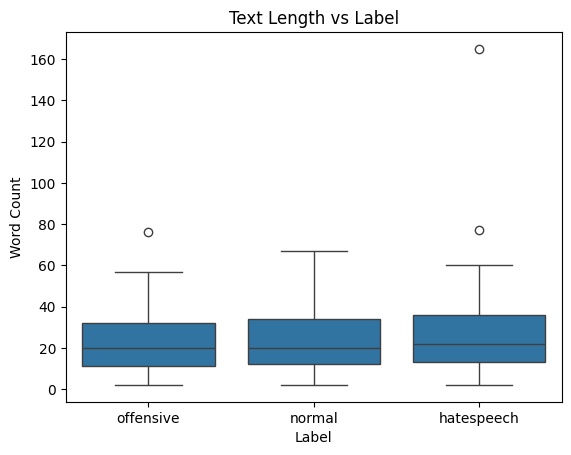

In [25]:
sns.boxplot(data=train_df,x="label",y="word_count")
plt.title("Text Length vs Label")
plt.ylabel("Word Count")
plt.xlabel("Label")
plt.show()

## Speech Occurance vs Labels
Used word clouds to demonstrate visually the occurance of various hate and offensive words from the texts


In [26]:
from wordcloud import WordCloud

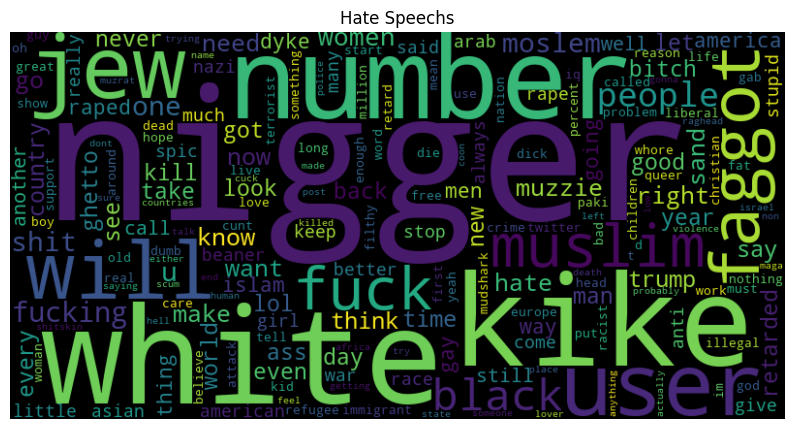

In [34]:
wc_hate = WordCloud(width=800,height=400,background_color='black',max_words=200,collocations=False)
wc_hate.generate(" ".join(hate_texts))
plt.figure(figsize=(10,6))
plt.imshow(wc_hate, interpolation="bilinear")
plt.axis("off")
plt.title("Hate Speechs")
plt.show()


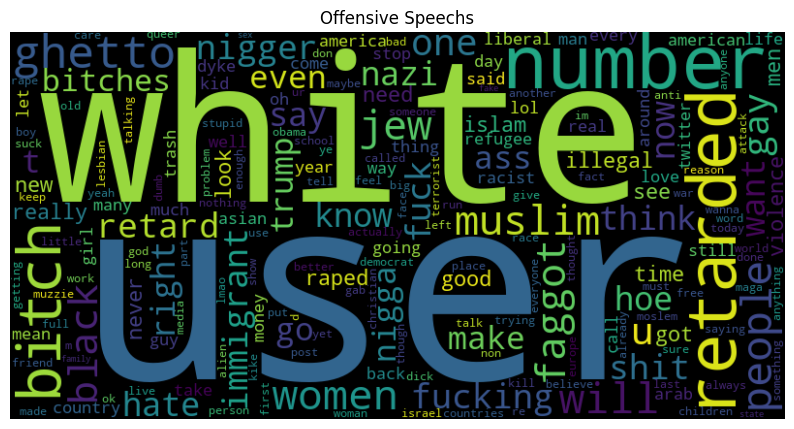

In [33]:
wc_off = WordCloud(width=800,height=400,background_color='black',max_words=200,collocations=False)
wc_off.generate(" ".join(off_texts))
plt.figure(figsize=(10,6))
plt.imshow(wc_off, interpolation="bilinear")
plt.axis("off")
plt.title("Offensive Speechs")
plt.show()
